In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.loc[df['sex']=='male', 'sex'] = 1
df.loc[df['sex']=='female', 'sex'] = 0
#split the data in to independent x and y variables
X = df.drop('DEATH_EVENT', axis =1)
y=df['DEATH_EVENT'].values.astype(np.float32)
X = X.values.astype(np.float32)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=1)

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
	keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']) 

model.save('heart_failure_model.h5')
history = model.fit(X_train, y_train, epochs=119, batch_size=1,validation_data=(X_val, y_val))

Epoch 1/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5787 - loss: 1774.6600 - val_acc: 0.7667 - val_loss: 37.2502
Epoch 2/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.5348 - loss: 230.1801 - val_acc: 0.2333 - val_loss: 513.1279
Epoch 3/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5945 - loss: 318.5910 - val_acc: 0.7667 - val_loss: 276.4767
Epoch 4/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5618 - loss: 248.0009 - val_acc: 0.2333 - val_loss: 1600.7336
Epoch 5/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5410 - loss: 370.6605 - val_acc: 0.2333 - val_loss: 381.5297
Epoch 6/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5708 - loss: 144.5161 - val_acc: 0.7667 - val_loss: 143.2162
Epoch 7/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5938 - loss: 86.2126 - val_acc: 0.7667 - val_loss: 95.2272
Epoch 8/119
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5907 - loss: 45.1610 - val_acc: 0.2333 - val_loss: 36.9887
Epoch 9/119
239/239

In [5]:
model.save('heart_failure_model.h5')

In [ ]:
import pickle
with open('training_history','wb') as file: 
    pickle.dump(history.history, file)

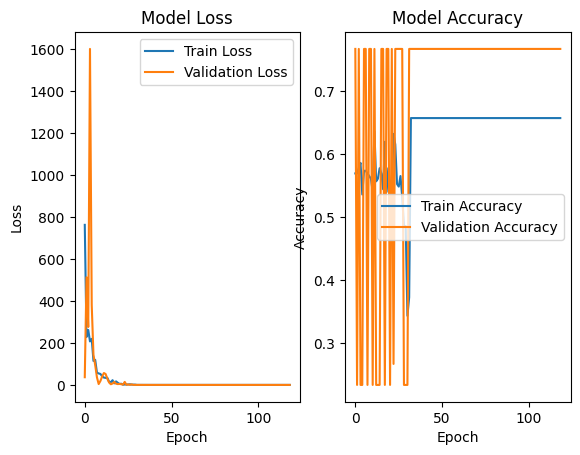

In [15]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history["acc"], label="Train Accuracy")
plt.plot(history.history["val_acc"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()